# 0. Hyperparameters
and imports

In [1]:
from evaluate_yolo_tracker import evaluate_sequence, VAL_SEQUENCES
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import numpy as np
import cv2
import os

# 1. Run Tracking

In [2]:
IOU_ASSOCIATION_TRESHOLD = 0.5
CONF_TRESHOLD = 0.2

Evaluating val1_difficult1
Running track mode...
Processing frame 570

Processed 20 frames in track mode.
Sequence processing time: 1.7575585842132568
Evaluating val1_difficult2
Running track mode...
Processing frame 570

Processed 20 frames in track mode.
Sequence processing time: 1.514505386352539
Evaluating val1_easy1
Running track mode...
Processing frame 570

Processed 20 frames in track mode.
Sequence processing time: 1.3565592765808105
Evaluating val1_easy2
Running track mode...
Processing frame 570

Processed 20 frames in track mode.
Sequence processing time: 1.4264147281646729
Evaluating val1_medium1
Running track mode...
Processing frame 570

Processed 20 frames in track mode.
Sequence processing time: 1.6095516681671143
MOTA: 0.3207357897787064, MOTP: 0.3054340732456692, IDF1: 0.4882805602356606


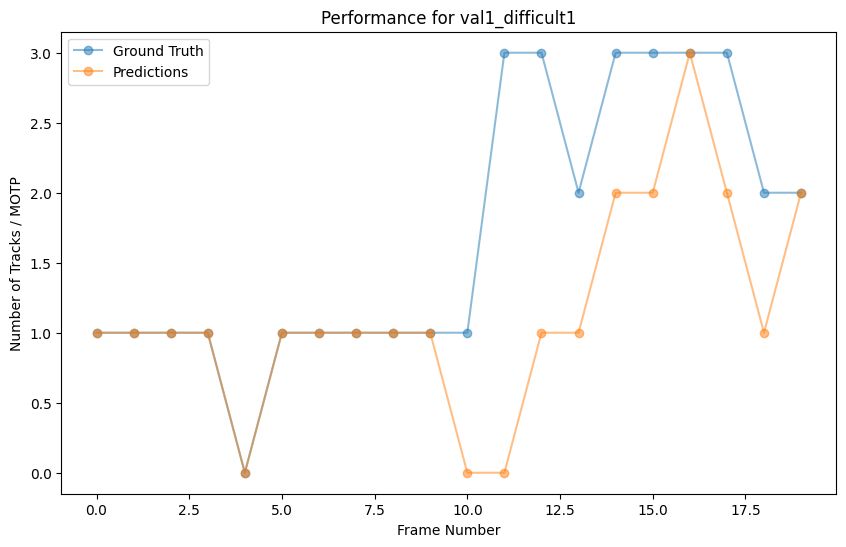

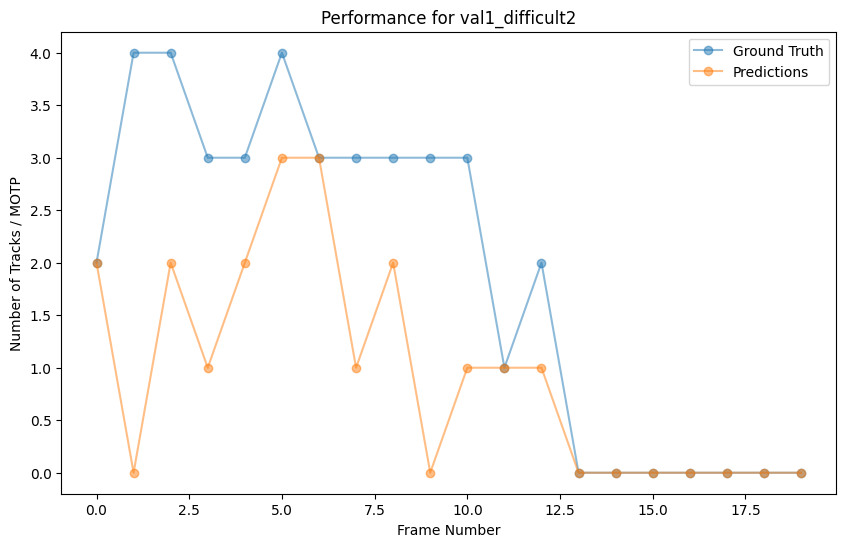

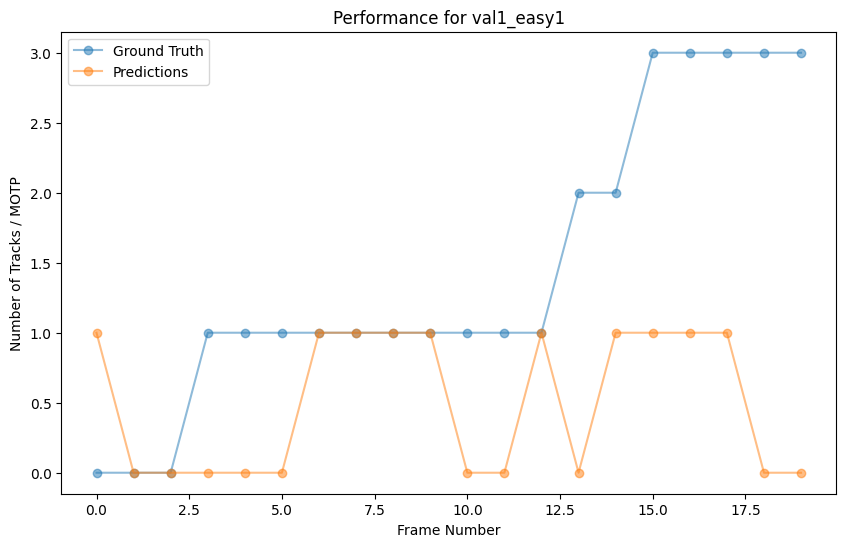

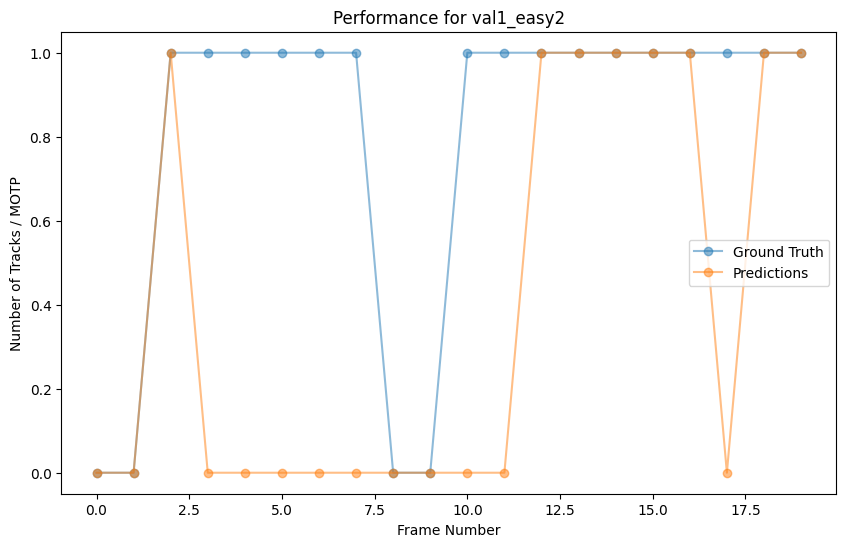

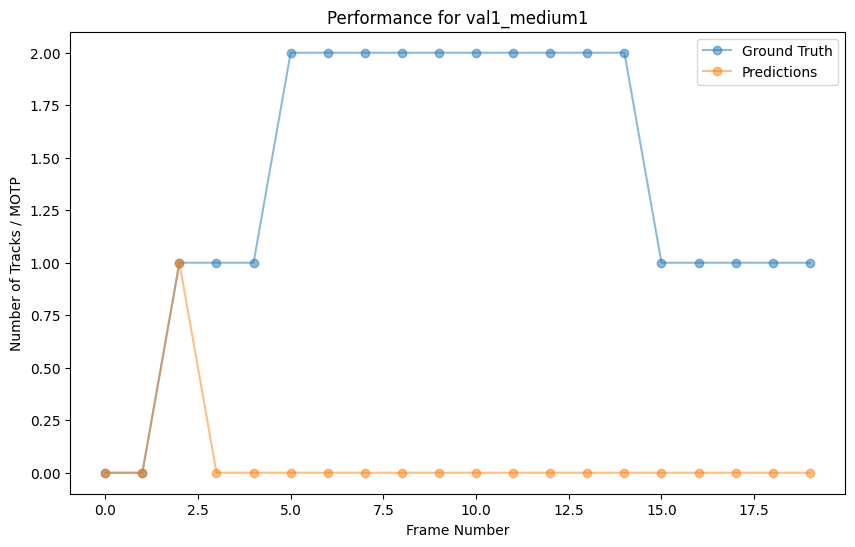

In [7]:
project = '/vol/biomedic3/bglocker/ugproj2324/fv220/dev/SharkTrack-Dev/models/p2v4_new_1000e_no_patience/'
model_path = os.path.join(project, 'weights/best.pt')

motas, motps, idf1s, _, _, performance_plots, aligned_annotations_list = evaluate_sequence(model_path, CONF_TRESHOLD, IOU_ASSOCIATION_TRESHOLD, imgsz=640, tracker='custom_botsort.yaml')
mota = np.mean(motas)
motp = np.mean(motps)
idf1 = np.mean(idf1s)
print(f'MOTA: {mota}, MOTP: {motp}, IDF1: {idf1}')

# Investigate with GT
For frames with poor graph performance, show the GT and PRED bounding boxes

In [17]:
def draw_bbox(img, gt_bbox, pred_bbox, pred_conf, track_ids):
  color1 = (0, 255, 0)
  color2 = (0, 0, 255)

  for bbox in gt_bbox:
    bbox = np.array(bbox).astype(int)
    pt1, pt2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
    img = cv2.rectangle(img, pt1, pt2, color1, int(max(img.shape[:2]) / 200))

  for i, pair in enumerate(zip(pred_bbox, pred_conf)):
    bbox, conf = pair
    bbox = np.array(bbox).astype(int)
    pt1, pt2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
    img = cv2.rectangle(img, pt1, pt2, color2, int(max(img.shape[:2]) / 200))
    text = f'Pred: {conf:.2f}'
    if len(track_ids) > 0:
      text += f' (ID: {track_ids[i]})'
    img = cv2.putText(img, text, (bbox[0], bbox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color2, 1, cv2.LINE_AA)

  # Add legend for color
  img = cv2.putText(img, 'Ground Truth', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color1, 2, cv2.LINE_AA)
  img = cv2.putText(img, 'Predictions', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, color2, 2, cv2.LINE_AA)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)


def plot_frame(frame_path, frame_num, aligned_annotations):
  """
  Plots the ground truth and predicted bounding boxes of a given frame.
  """
  gt_bbox = aligned_annotations['gt_bbox_xyxys'][frame_num]
  pred_bbox = aligned_annotations['pred_bbox_xyxys'][frame_num]
  pred_conf = aligned_annotations['pred_confidences'][frame_num]
  track_ids = aligned_annotations['pred_track_ids']
  if len(track_ids) > 0:
    track_ids = track_ids[frame_num]

  # Convert frame number to timestamp (in milliseconds)
  timestamp = (frame_num / 10) * 1000  # frame_num / fps * 1000

  # Read the frame
  frame = cv2.imread(frame_path)

  # Plot the ground truth and predicted bounding boxes
  draw_bbox(frame, gt_bbox, pred_bbox, pred_conf, track_ids)

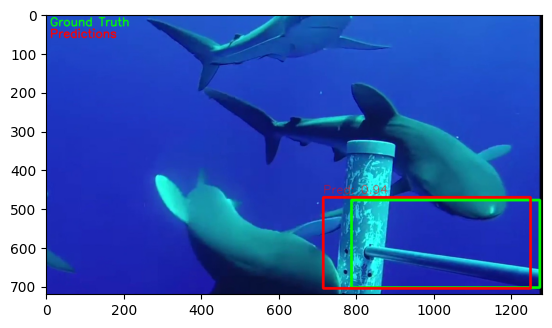

In [7]:
dataset = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/phase2'
sequence = 'val1_difficult2'
frame_to_inspect = 5
frame_name = f'{sequence}_frame{frame_to_inspect*30}.jpg'
frame_path = os.path.join(dataset, sequence, frame_name)
plot_frame(frame_path, frame_to_inspect, aligned_annotations_list[0])

Inspecting sequence val1_difficult2
Frame 0, conf: [0.9476230144500732, 0.9447992444038391]


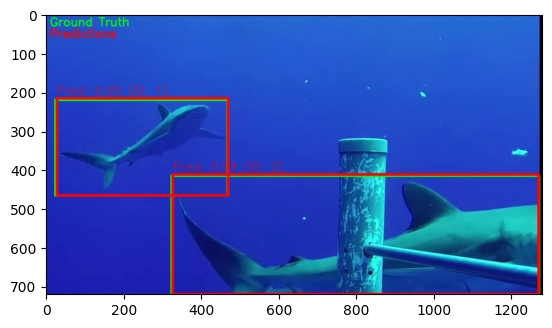

Frame 1, conf: []


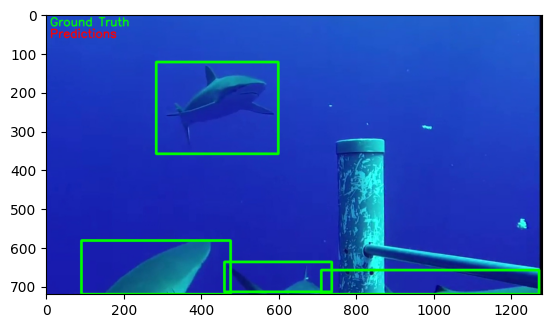

Frame 2, conf: [0.9442209601402283, 0.9336076974868774]


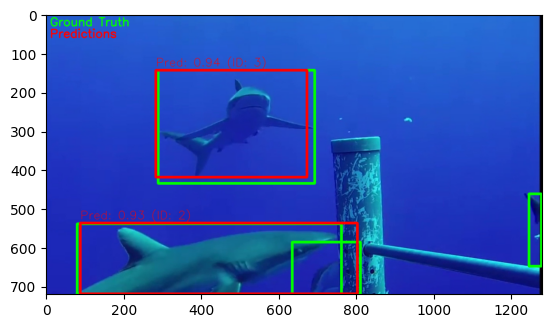

Frame 3, conf: [0.9501640796661377]


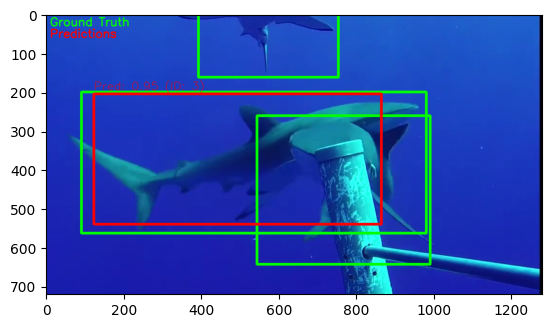

Frame 4, conf: [0.9338459372520447, 0.927060604095459]


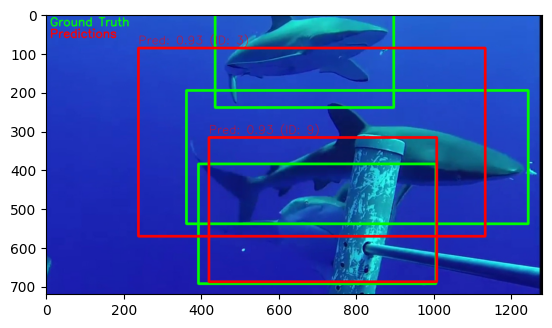

Frame 5, conf: [0.953605592250824, 0.9452029466629028, 0.9352562427520752]


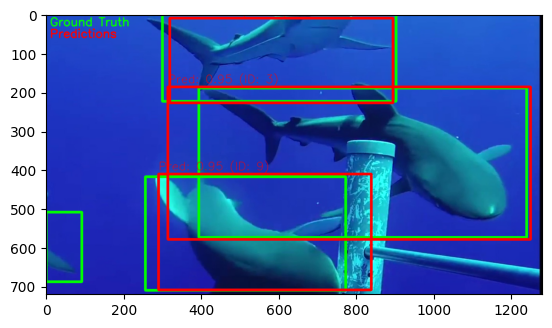

Frame 6, conf: [0.9627243280410767, 0.9414149522781372, 0.9567147493362427]


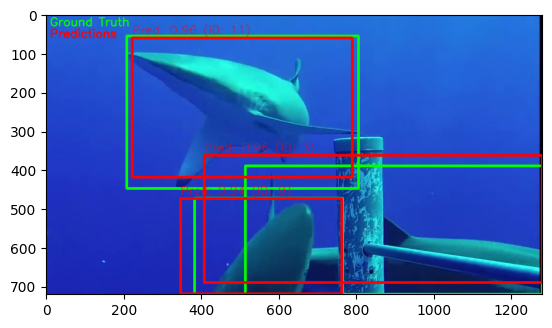

Frame 7, conf: [0.9469565749168396]


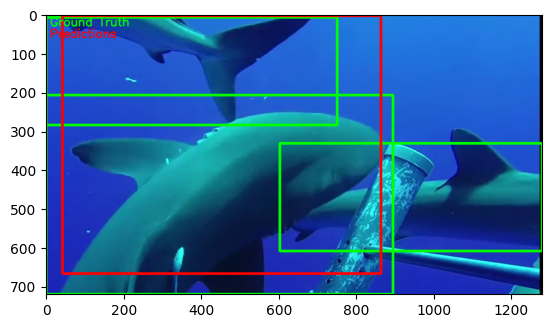

Frame 8, conf: [0.9541610479354858, 0.9489957690238953]


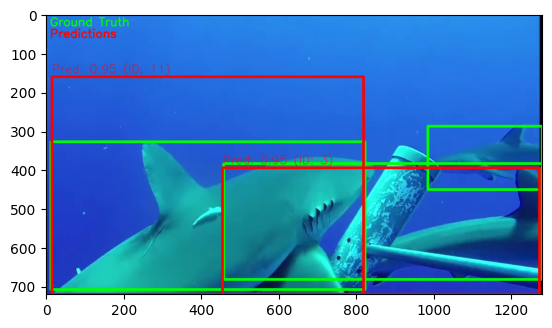

Frame 9, conf: []


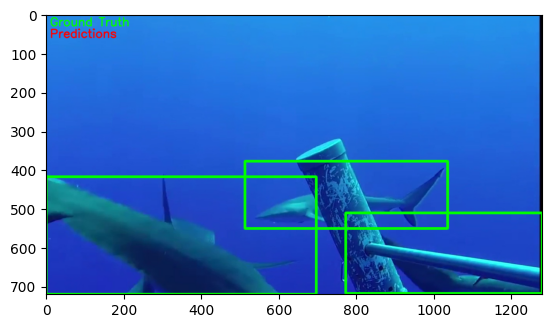

Frame 10, conf: [0.934991180896759]


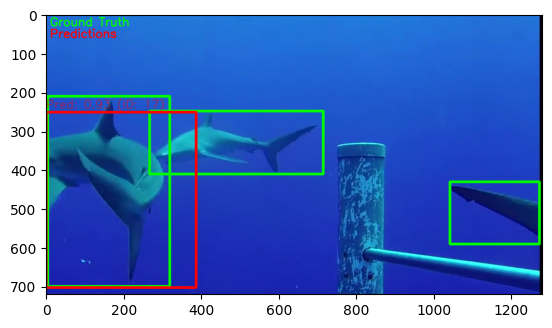

Frame 11, conf: [0.933235764503479]


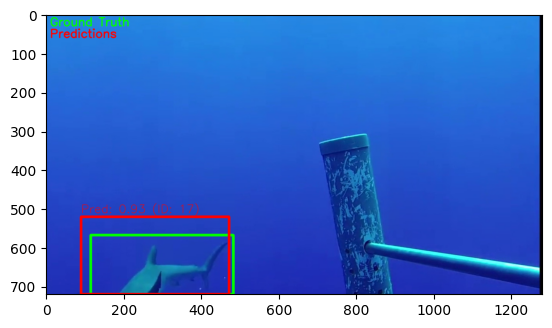

Frame 12, conf: [0.9238290786743164]


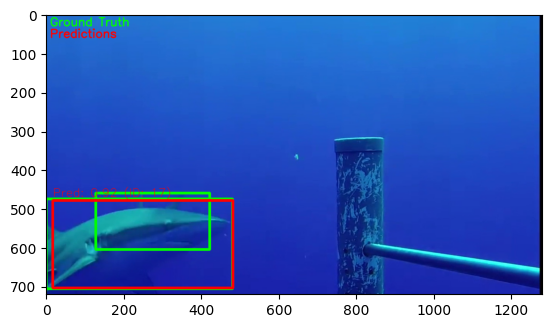

Frame 13, conf: []


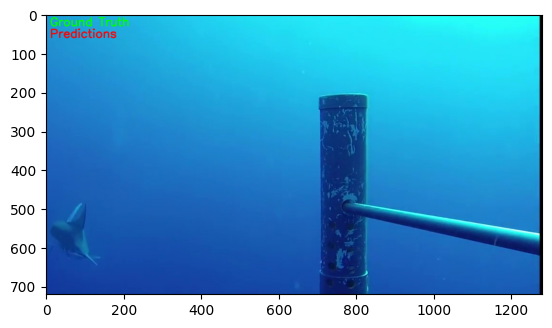

Frame 14, conf: []


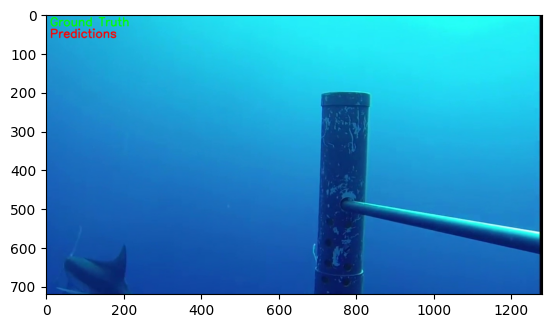

Frame 15, conf: []


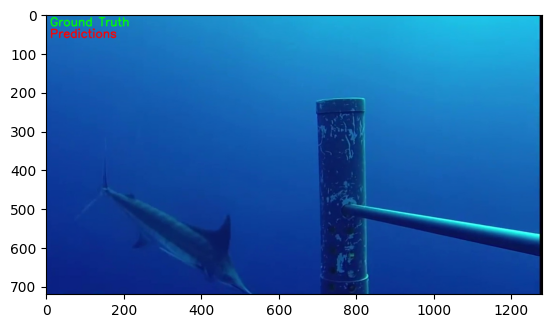

Frame 16, conf: []


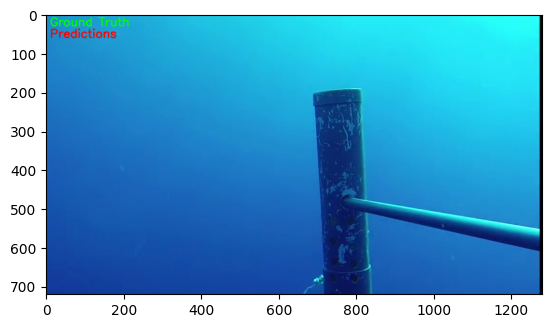

Frame 17, conf: []


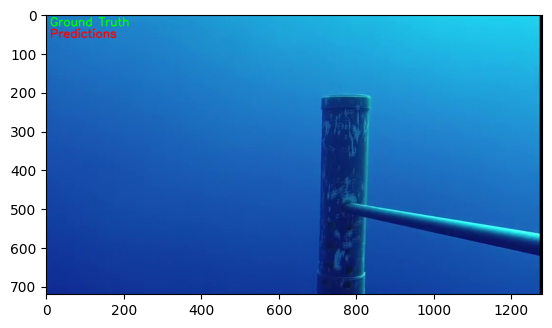

Frame 18, conf: []


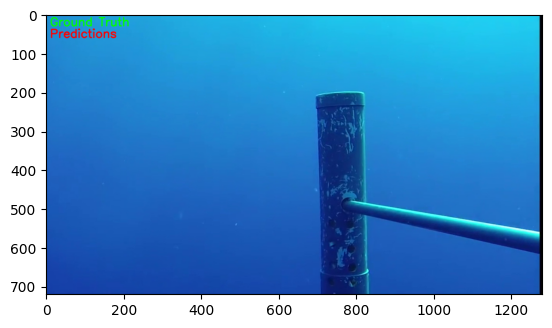

Frame 19, conf: []


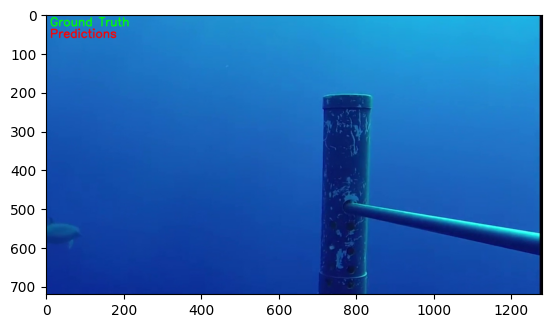

In [18]:
# Bulk It
i = 1
sequence = VAL_SEQUENCES[i]
print(f'Inspecting sequence {sequence}')
seq_annotations = aligned_annotations_list[i]
for frame_to_inspect in range(len(seq_annotations['gt_bbox_xyxys'])):
  conf = seq_annotations['pred_confidences'][frame_to_inspect]
  print(f'Frame {frame_to_inspect}, conf: {conf}')
  frame_name = f'{sequence}_frame{frame_to_inspect*30}.jpg'
  frame_path = os.path.join(dataset, sequence, frame_name)
  plot_frame(frame_path, frame_to_inspect, seq_annotations)
  plt.show()
  plt.pause(1)

## No tracking

Evaluating val1_difficult1
Running detect mode...
Processing frame 570

Processed 20 frames in detect mode.
Sequence processing time: 1.2822699546813965
Evaluating val1_difficult2
Running detect mode...
Processing frame 570

Processed 20 frames in detect mode.
Sequence processing time: 1.172612190246582
Evaluating val1_easy1
Running detect mode...
Processing frame 570

Processed 20 frames in detect mode.
Sequence processing time: 1.171215295791626
Evaluating val1_easy2
Running detect mode...
Processing frame 570

Processed 20 frames in detect mode.
Sequence processing time: 1.1822009086608887
Evaluating val1_medium1
Running detect mode...
Processing frame 570

Processed 20 frames in detect mode.
Sequence processing time: 1.258648157119751
Evaluating val1_medium2
Running detect mode...
Processing frame 570

Processed 20 frames in detect mode.
Sequence processing time: 1.2103111743927002
Evaluating sp_natgeo2
Running detect mode...
Processing frame 480

Processed 17 frames in detect mode

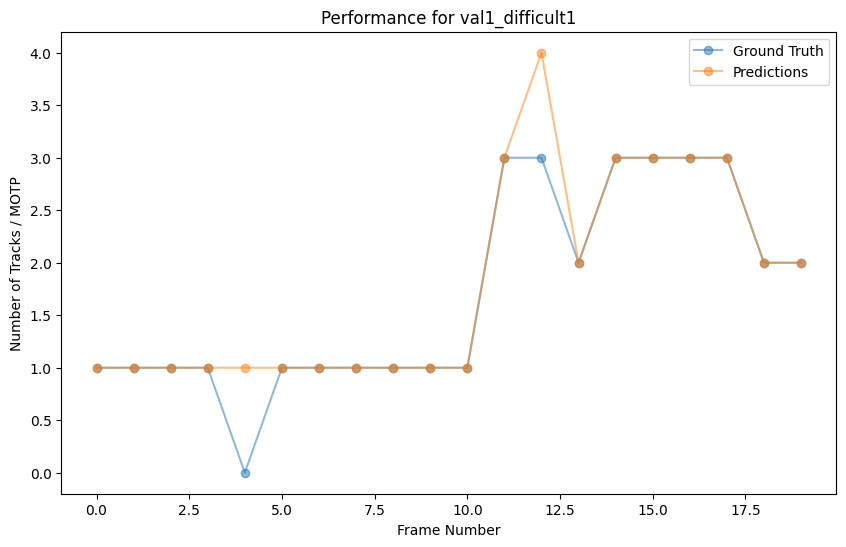

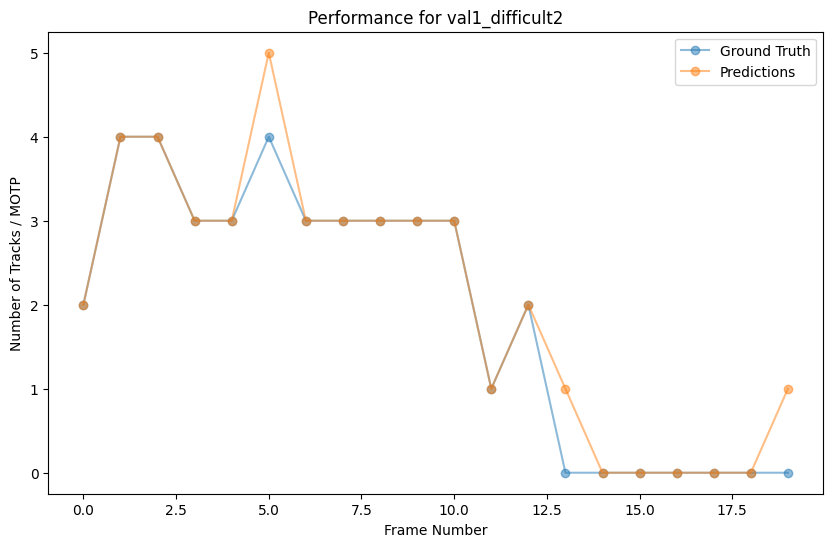

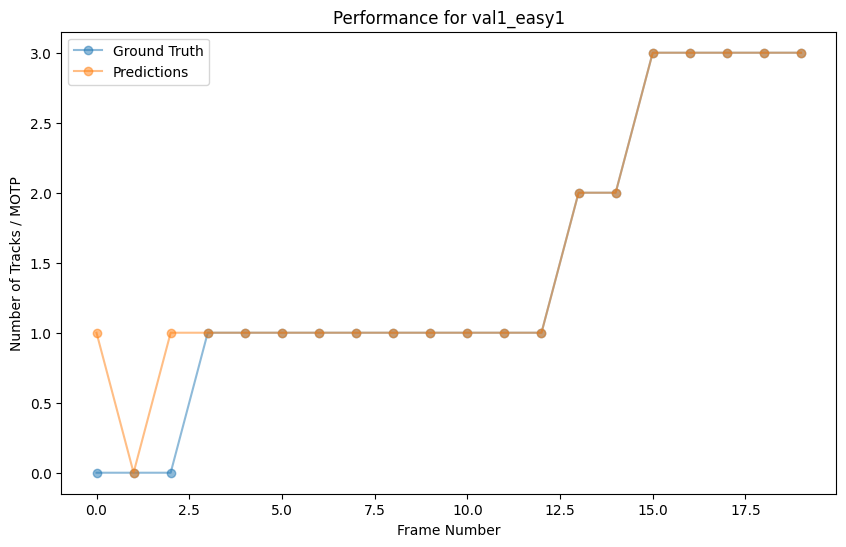

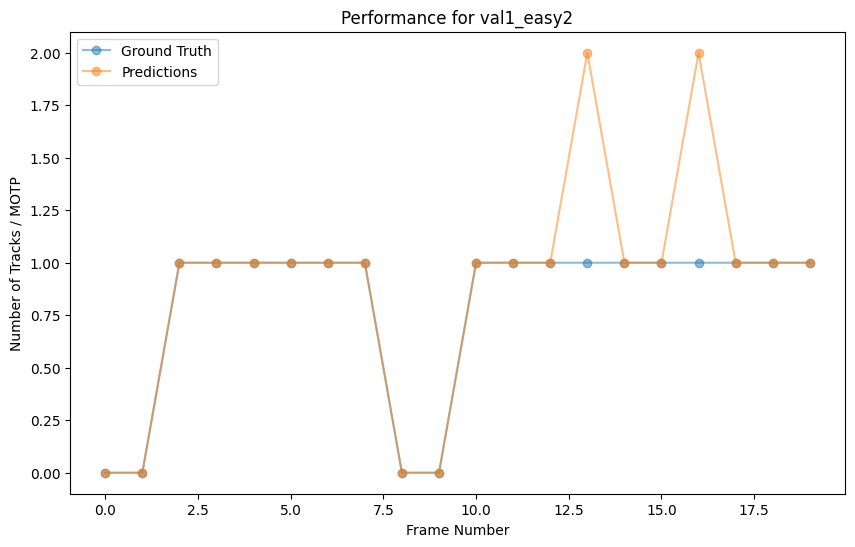

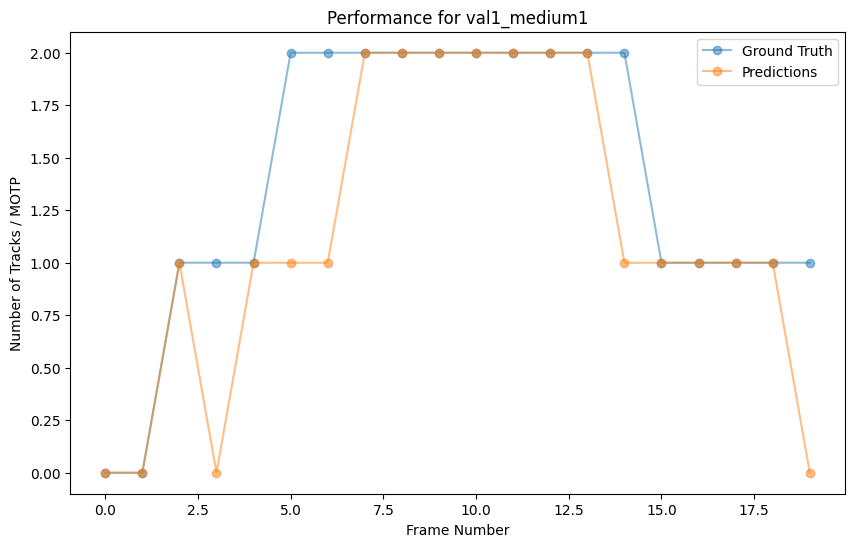

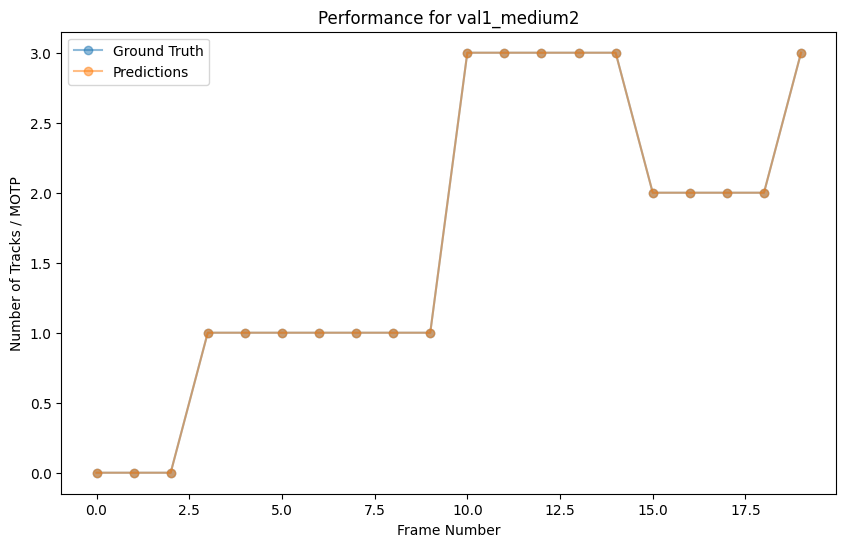

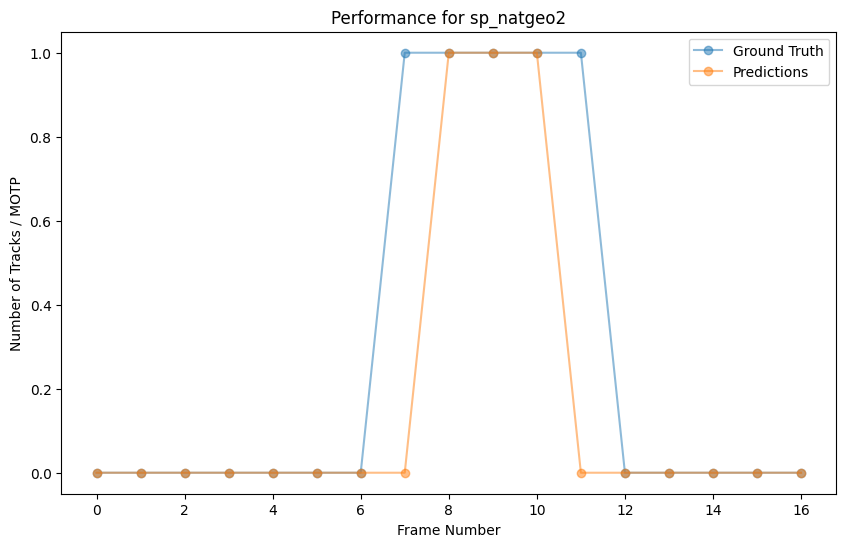

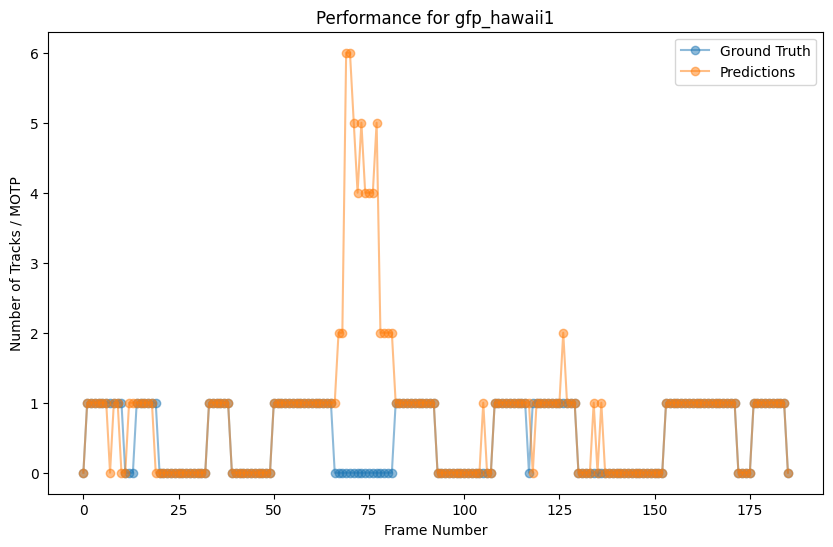

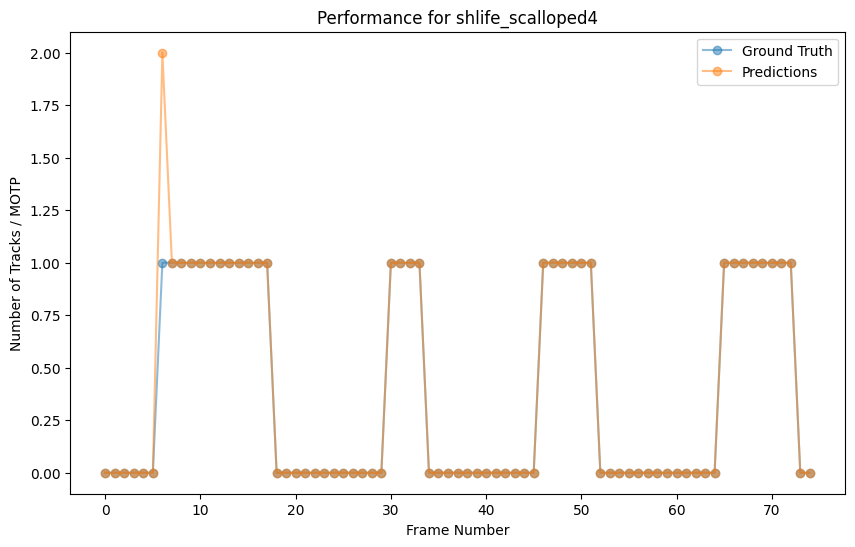

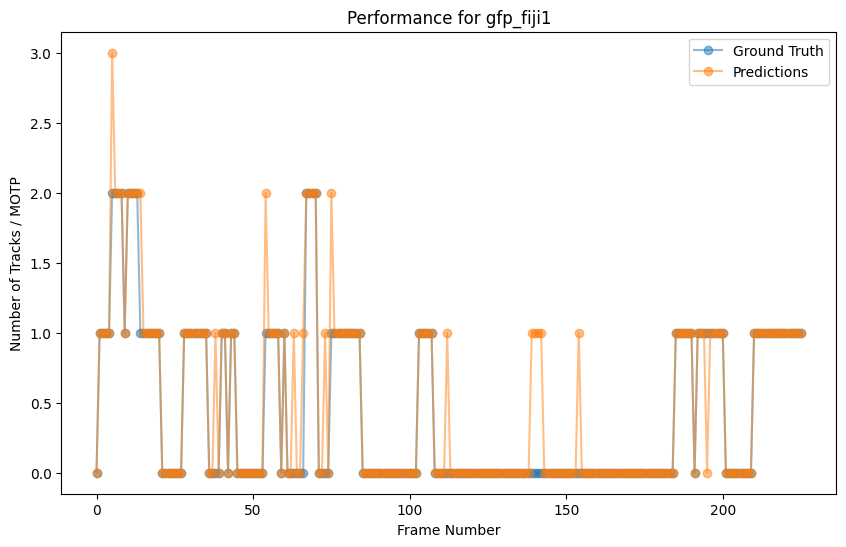

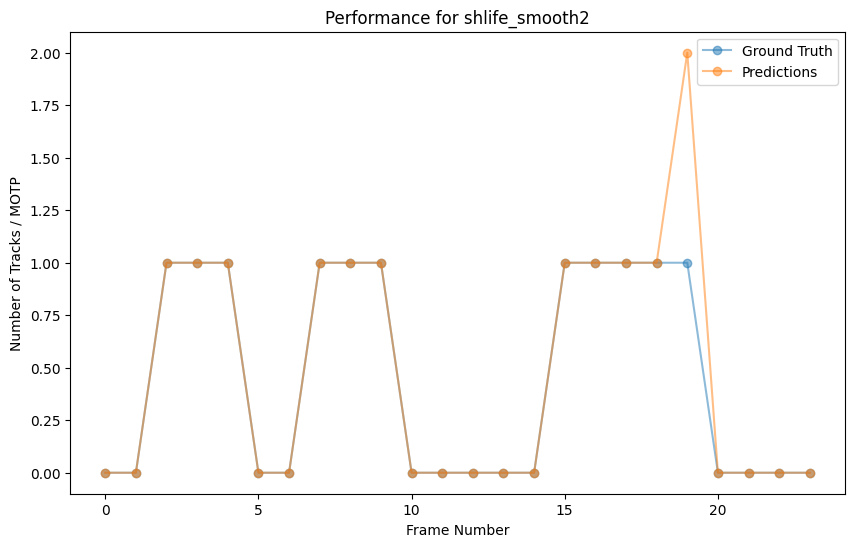

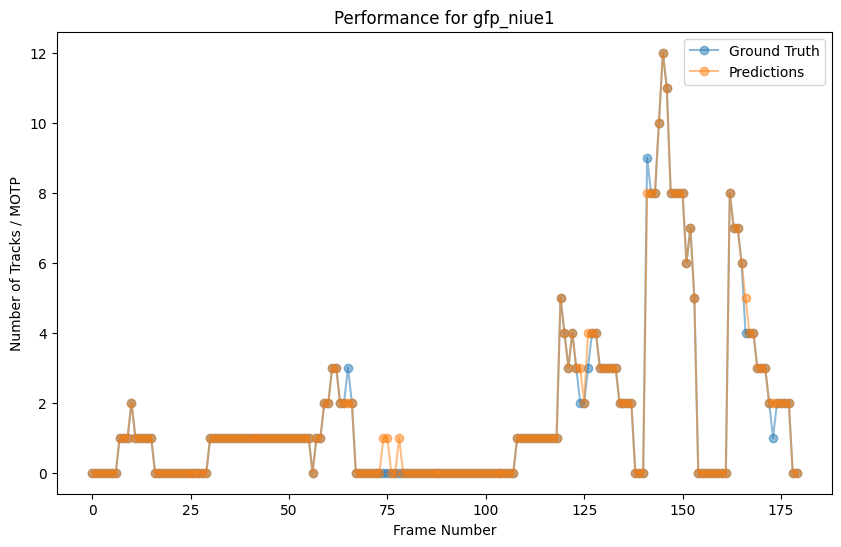

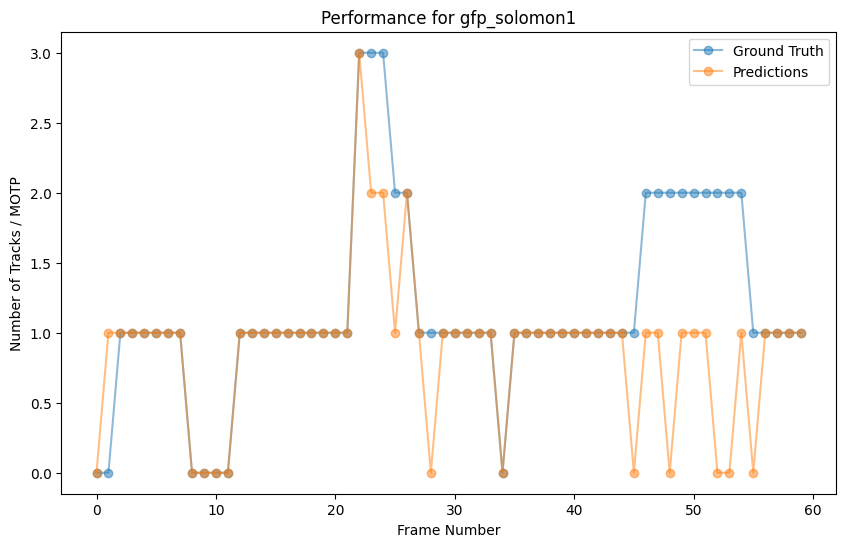

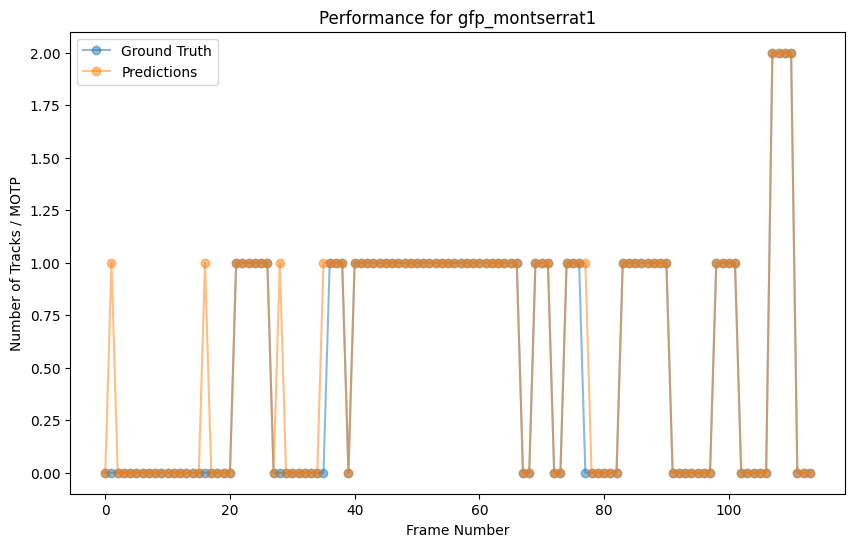

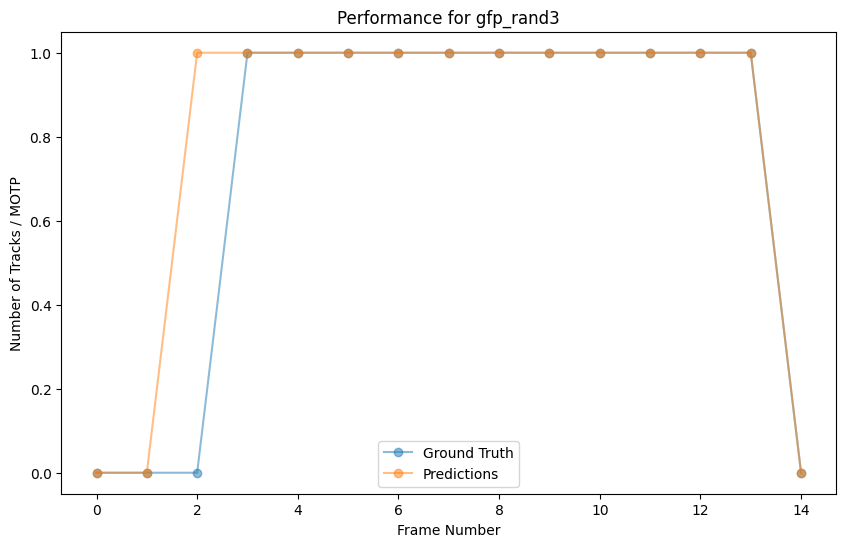

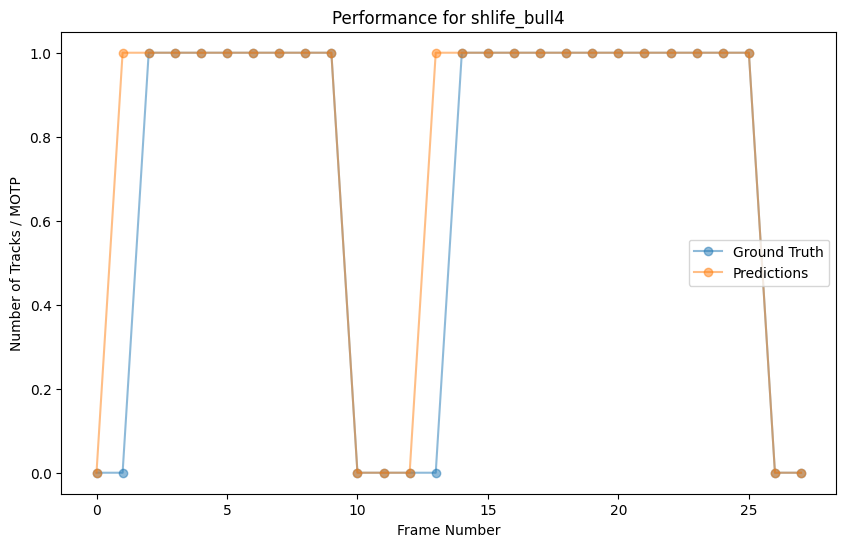

In [9]:
project = '/vol/biomedic3/bglocker/ugproj2324/fv220/dev/SharkTrack-Dev/models/p2v4_new_1000e_no_patience/'
model_path = os.path.join(project, 'weights/best.pt')

motas, motps, idf1s, _, _, performance_plots, aligned_annotations_list_ = evaluate_sequence(model_path, CONF_TRESHOLD, IOU_ASSOCIATION_TRESHOLD, imgsz=640, tracker=None)
mota = np.mean(motas)
motp = np.mean(motps)
idf1 = np.mean(idf1s)
print(f'MOTA: {mota}, MOTP: {motp}, IDF1: {idf1}')

Inspecting sequence val1_difficult2
Frame 0, conf: [0.9476230144500732, 0.9447992444038391]


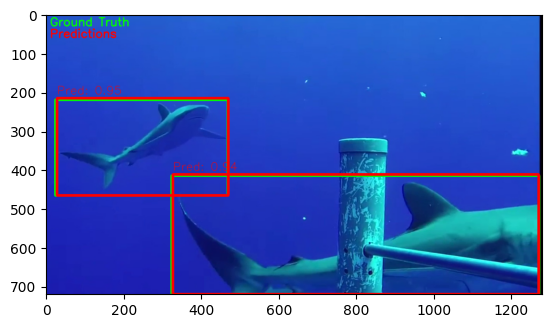

Frame 1, conf: [0.9452071785926819, 0.9057835340499878, 0.8893526196479797, 0.8512365221977234]


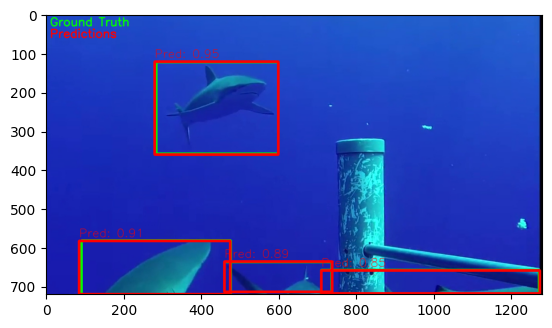

Frame 2, conf: [0.9442209601402283, 0.9336076974868774, 0.9198792576789856, 0.6464827060699463]


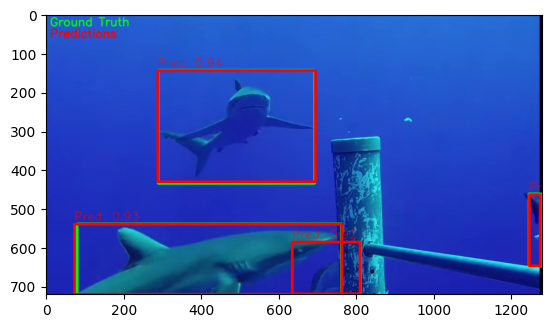

Frame 3, conf: [0.9501640796661377, 0.9438649415969849, 0.9291723370552063]


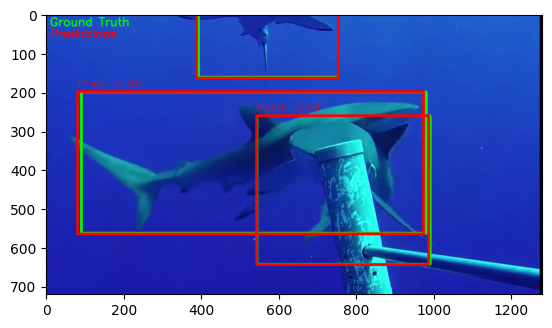

Frame 4, conf: [0.9547528028488159, 0.9338459372520447, 0.927060604095459]


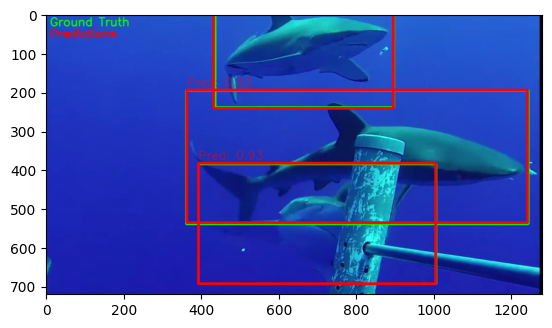

Frame 5, conf: [0.953605592250824, 0.9452029466629028, 0.9352562427520752, 0.364209920167923, 0.3553239703178406]


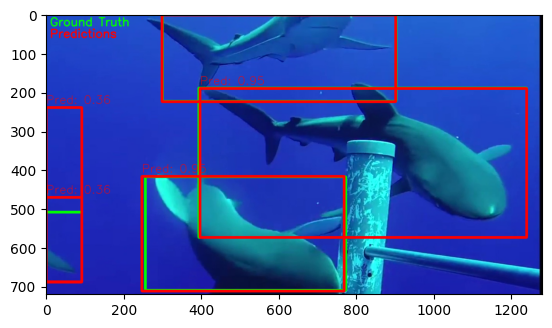

Frame 6, conf: [0.9627243280410767, 0.9567147493362427, 0.9414149522781372]


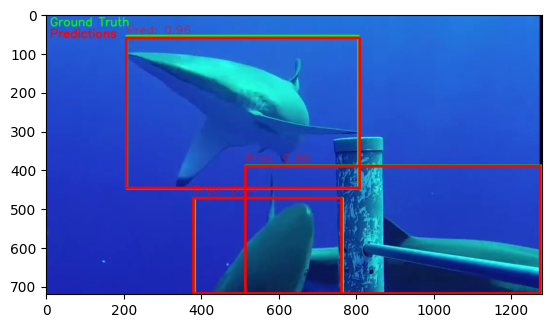

Frame 7, conf: [0.9525049328804016, 0.9469565749168396, 0.9347400069236755]


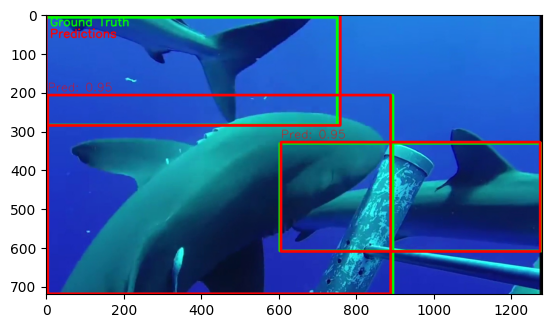

Frame 8, conf: [0.9541610479354858, 0.9489957690238953, 0.9428479671478271]


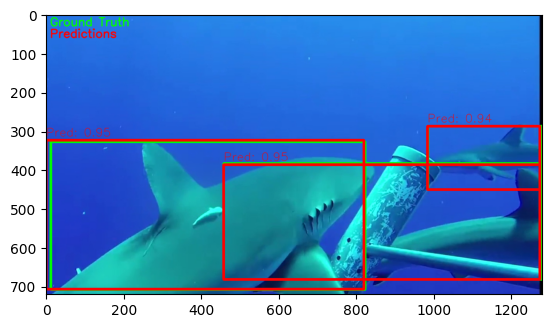

Frame 9, conf: [0.9404001235961914, 0.9365348219871521, 0.9281118512153625]


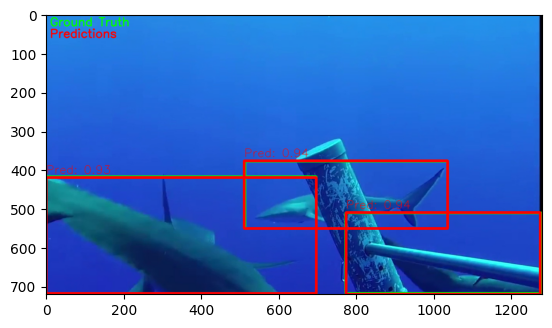

Frame 10, conf: [0.9384382963180542, 0.9378525614738464, 0.934991180896759]


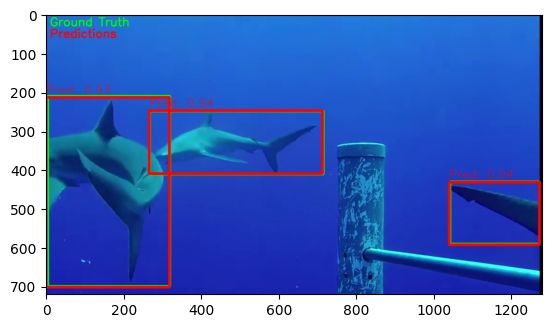

Frame 11, conf: [0.933235764503479]


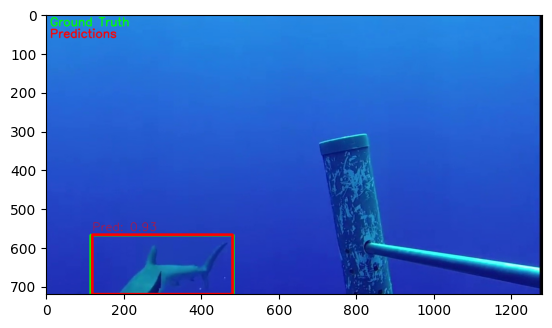

Frame 12, conf: [0.9238290786743164, 0.915544331073761]


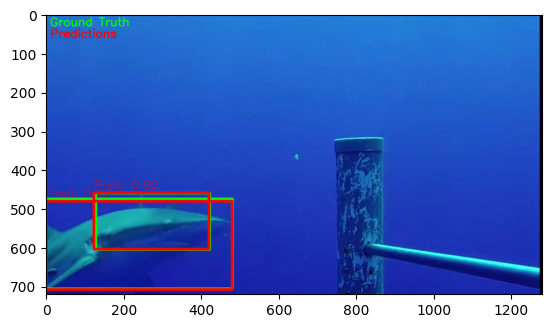

Frame 13, conf: [0.8899973034858704]


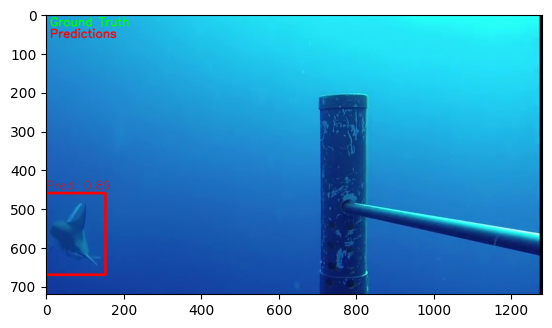

Frame 14, conf: []


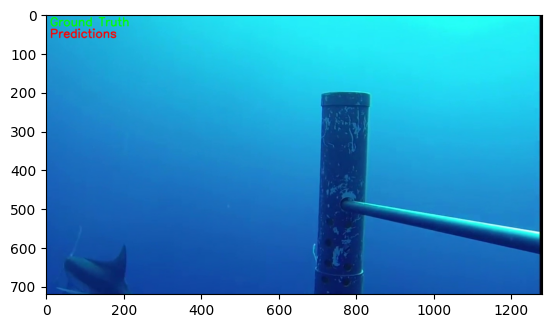

Frame 15, conf: []


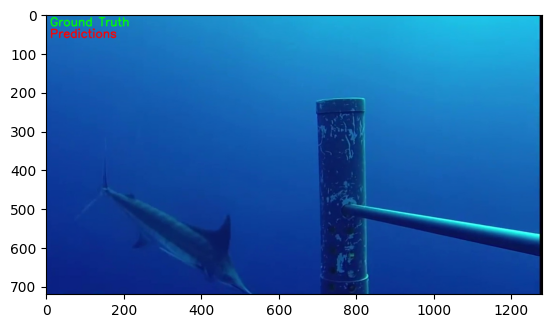

Frame 16, conf: []


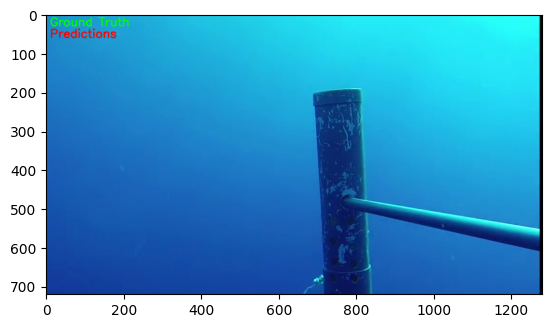

Frame 17, conf: []


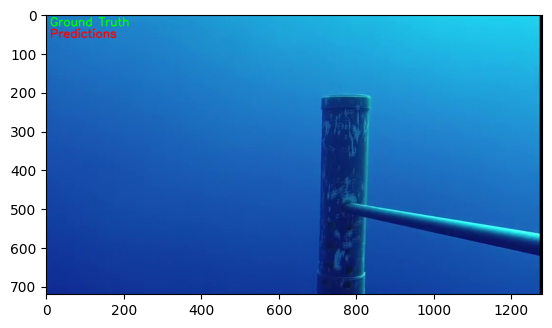

Frame 18, conf: []


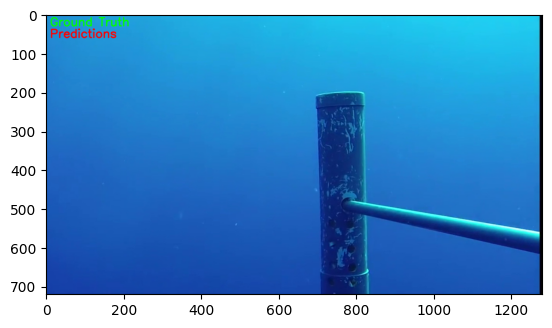

Frame 19, conf: [0.738113284111023]


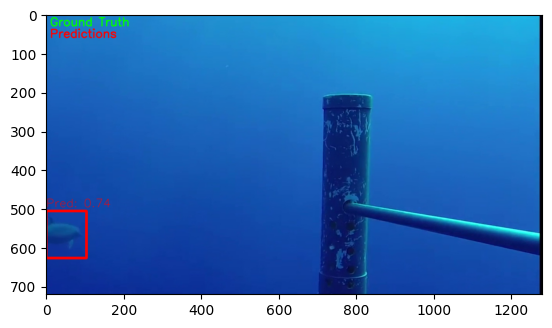

In [19]:
# Bulk It
i = 1
sequence = VAL_SEQUENCES[i]
print(f'Inspecting sequence {sequence}')
seq_annotations = aligned_annotations_list_[i]
for frame_to_inspect in range(len(seq_annotations['gt_bbox_xyxys'])):
  conf = seq_annotations['pred_confidences'][frame_to_inspect]
  print(f'Frame {frame_to_inspect}, conf: {conf}')
  frame_name = f'{sequence}_frame{frame_to_inspect*30}.jpg'
  frame_path = os.path.join(dataset, sequence, frame_name)
  plot_frame(frame_path, frame_to_inspect, seq_annotations)
  plt.show()
  plt.pause(1)

# Investigate Inference

In [12]:
def get_bboxes(df, frame_num):
  """
  Given dataframe with following columns:
  row['4-7: Img-bbox(TL_x']
  row['TL_y']
  row['BR_x']
  row['BR_y)']

  extract list of bounding boxes for col '3: Unique Frame Identifier' = frame_num
  """
  return df[df['3: Unique Frame Identifier'] == frame_num][['4-7: Img-bbox(TL_x', 'TL_y', 'BR_x', 'BR_y)']].values.tolist()

def plot_from_video(video, frame_num, fps, annotations):
  """
  Plots the ground truth and predicted bounding boxes of a given frame.
  """
  pred_bbox = get_bboxes(annotations, frame_num)

  # Convert frame number to timestamp (in milliseconds)
  timestamp = (frame_num / fps) * 1000  # frame_num / fps * 1000

  # Extract the frame from the video at the specific timestamp
  cap = cv2.VideoCapture(video)
  cap.set(cv2.CAP_PROP_POS_MSEC, timestamp)
  ret, frame = cap.read()
  cap.release()


  # Plot the ground truth and predicted bounding boxes
  draw_bbox(frame, [], pred_bbox)


In [ ]:
annotations = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/annotations/mwitt/AXA_NOV23_v3_non_empty_2'

for bruv in os.listdir(annotations):
  if not bruv == 'AXA_2023-2121011':
    continue
  for annotation in os.listdir(os.path.join(annotations, bruv))[::-1]:
    assert annotation.endswith('.csv')
    video_path = os.path.join('/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/videos_raw/mwitt/AXA_NOV23_no_streams', bruv, annotation.replace('_tracks_5fps.csv', '.mp4'))
    predictions = os.path.join(annotations, bruv, annotation)
    predictions_df = pd.read_csv(predictions, skiprows=lambda x: x in [1])

    print(f'processing {predictions}...')

    fps = 5
    frames = set()
    for index, row in predictions_df.iterrows():
      frame_to_inspect = row['3: Unique Frame Identifier']
      conf = row['8: Detection or Length Confidence']
      if any([frame_to_inspect + n in frames for n in range(-5, 5)]):
        continue
      frames.add(frame_to_inspect)
      print(f'{frame_to_inspect=}, {conf=}, time: {frame_to_inspect/fps}, {predictions.replace("/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/annotations/mwitt/AXA_NOV23_v3_non_empty_2/", "")}')
      plot_from_video(video_path, frame_to_inspect, fps, predictions_df)
      plt.pause(1)


# 7. Bulk-Test all videos

In [18]:
video_folder = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/sharktrack_test/grayscale_videos/'
annotations_folder = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/sharktrack_test/annotations/'
model_path = '/vol/biomedic3/bglocker/ugproj2324/fv220/dev/shark_locator_tests/runs/detect/train3/weights/best.pt'

testing model /vol/biomedic3/bglocker/ugproj2324/fv220/dev/shark_locator_tests/runs/detect/train3/weights/best.pt
Evaluating medium1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

medium1.mp4 - MOTA: 0.28, MOTP: 0.26, IDF1: 0.43


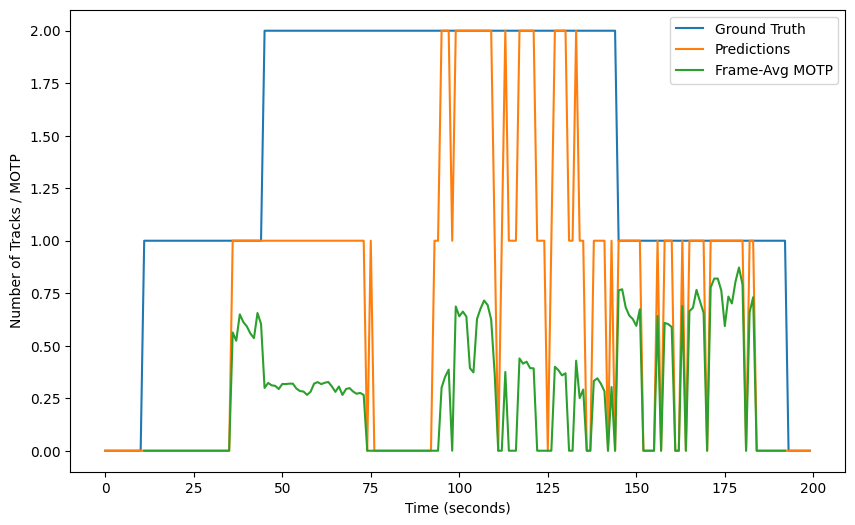

Evaluating easy1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

easy1.mp4 - MOTA: 0.78, MOTP: 0.63, IDF1: 0.69


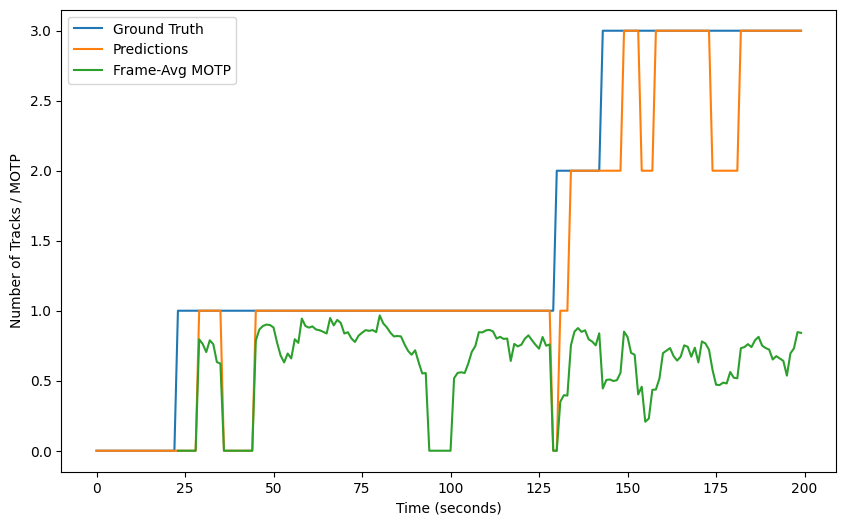

Evaluating difficult2.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

difficult2.mp4 - MOTA: 0.27, MOTP: 0.29, IDF1: 0.41


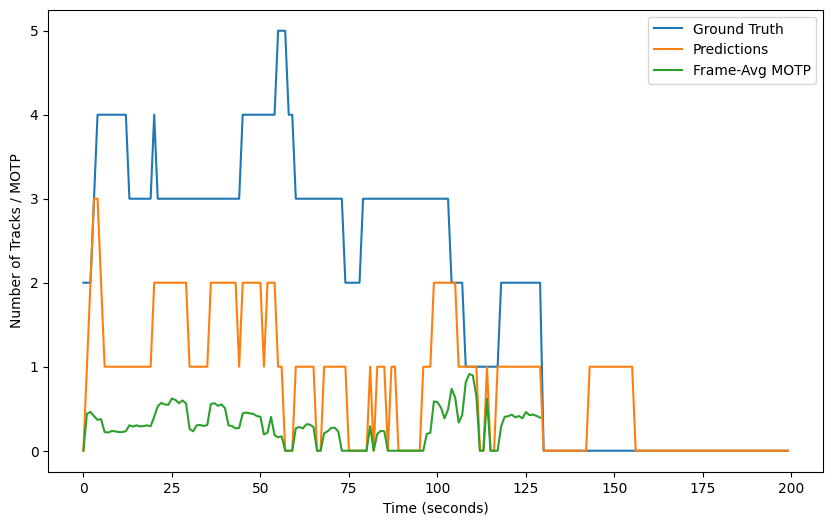

Evaluating difficult1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

difficult1.mp4 - MOTA: 0.21, MOTP: 0.17, IDF1: 0.35


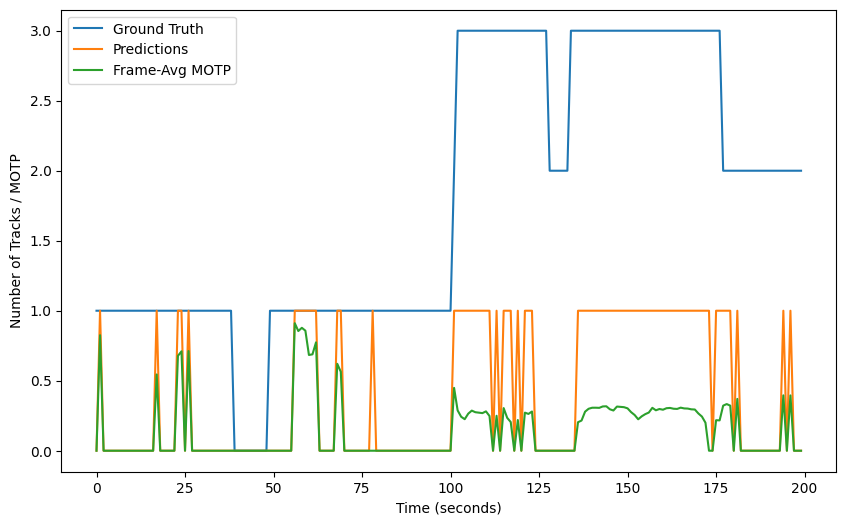

Evaluating easy2.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

easy2.mp4 - MOTA: 0.72, MOTP: 0.6, IDF1: 0.76


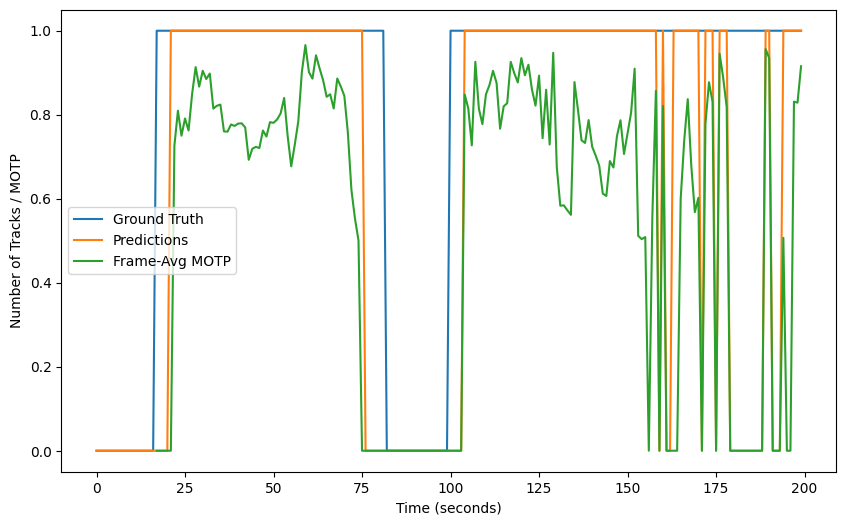

Evaluating medium2.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

medium2.mp4 - MOTA: 0.33, MOTP: 0.27, IDF1: 0.5


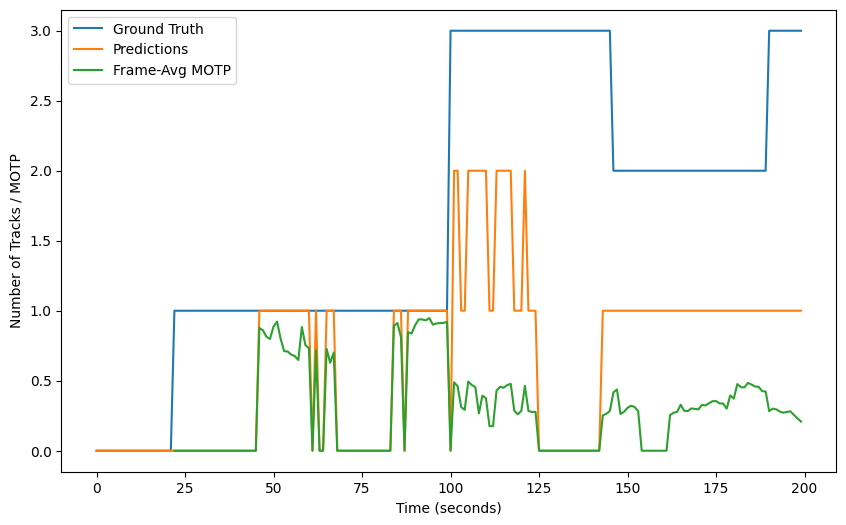

Avg results: MOTA: 0.43, MOTP: 0.37, IDF1: 0.52


In [20]:
videos = os.listdir(video_folder)
print('testing model ' + model_path)
model = YOLO(model_path)

motas = []
motps = []
idf1s = []

for video in videos:
  print(f'Evaluating {video}')
  video_path = video_folder + video
  annotations_path = annotations_folder + video[:-4] + '.csv'
  annotations = pd.read_csv(annotations_path)
  results = model.track(source=video_path, persist=True, conf=CONF_TRESHOLD, verbose=False)
  extracted_pred_results = yolo_extract_tracks(results)
  aligned_annotations = align_annotations_with_predictions_dict_corrected(annotations, extracted_pred_results, VIDEO_LENGTH)
  mota, motp, idf1, frame_avg_motp = evaluate_tracking(aligned_annotations, IOU_ASSOCIATION_TRESHOLD)
  motas.append(mota)
  motps.append(motp)
  idf1s.append(idf1)
  print(f'{video} - MOTA: {round(mota, 2)}, MOTP: {round(motp, 2)}, IDF1: {round(idf1, 2)}')
  plot_performance_graph(aligned_annotations, frame_avg_motp)

print(f'Avg results: MOTA: {round(np.mean(motas), 2)}, MOTP: {round(np.mean(motps), 2)}, IDF1: {round(np.mean(idf1s), 2)}')